# 3과 과제
## 1번
### plotly를 이용한 animation 적용사례를 프로그램과 결과를 제공하라.

#### 참고 사이트
- https://plotly.com/python/animations/
- 

In [ ]:
# Animated figures with Plotly Express

# Gapminder Dataset
# animation_frame = 'year'
# animation_group = 'country'

import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x='gdpPercap', y='lifeExp', animation_frame='year', animation_group='country',
           size='pop', color='continent', hover_name='country',
           log_x=True, size_max=55, range_x=[100, 100000], range_y=[25, 90])

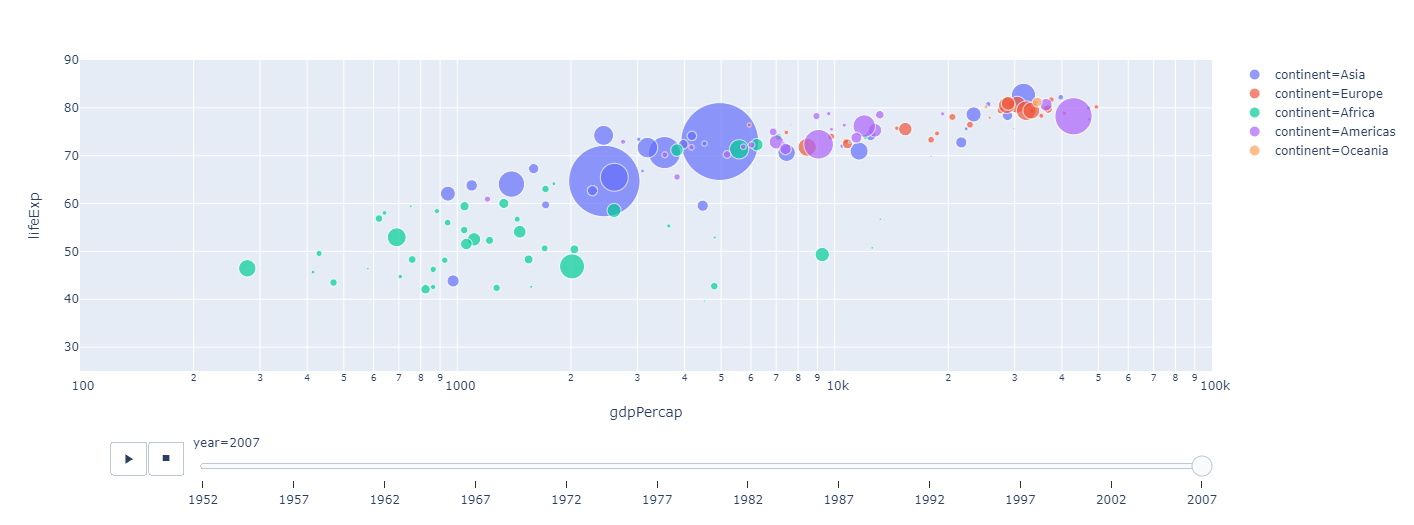

In [2]:
# Animated figures in Dash
# Dash is the best way to build analytical apps in Python using Plotly figures.

!pip install dash

     |████████████████████████████████| 7.3 MB 5.3 MB/s 
     |████████████████████████████████| 23.9 MB 14 kB/s 
     |████████████████████████████████| 357 kB 67.6 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=6ab7ca53ce0073433a30550fc7982d339550713dafc5141d1e0527e7b7802f8b
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=269273ed5e0fa910e83fd8fabf2297c9c2751bcd17f8c1212bafc0d6f4af2ddb
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=6cb5e0edb6bf9de1c22c91ccc340028cf0cfb9110324d6060655ebba34d74f40
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aefd

In [6]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

df = px.data.gapminder()
animations = {
    'Scatter': px.scatter(
        df, x="gdpPercap", y="lifeExp", animation_frame="year", 
        animation_group="country", size="pop", color="continent", 
        hover_name="country", log_x=True, size_max=55, 
        range_x=[100,100000], range_y=[25,90]),
    'Bar': px.bar(
        df, x="continent", y="pop", color="continent", 
        animation_frame="year", animation_group="country", 
        range_y=[0,4000000000]),
}

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Select an animation:"),
    dcc.RadioItems(
        id='selection',
        options=[{'label': x, 'value': x} for x in animations],
        value='Scatter'
    ),
    dcc.Graph(id="graph"),
])

@app.callback(
    Output("graph", "figure"), 
    [Input("selection", "value")])
def display_animated_graph(s):
    return animations[s]

app.run_server(debug=True)

In [7]:
# Animated Bar Charts with Plotly Express

import plotly.express as px

df = px.data.gapminder()

fig = px.bar(df, x='continent', y='pop', color='continent',
             animation_frame='year', animation_group='country', range_y=[0,4000000000])

fig.show()

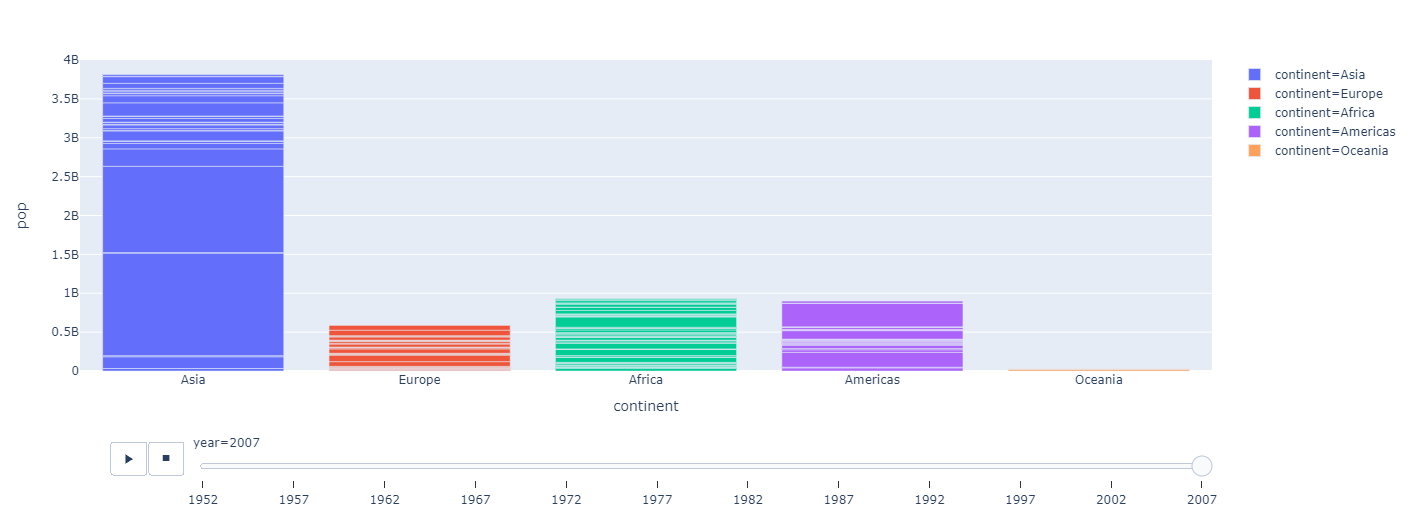

In [8]:
# Simple Play Button

import plotly.graph_objects as go

fig = go.Figure(
    data = [go.Scatter(x=[0, 1], y=[0, 1])],
    layout = go.Layout(
        xaxis = dict(range=[0, 5], autorange=False),
        yaxis = dict(range=[0, 5], autorange=False),
        title="Start Title",
        updatemenus=[dict(
            type='buttons',
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None])])]
    ),
    
    frames = [go.Frame(data=[go.Scatter(x=[1, 2], y=[1, 2])]),
              go.Frame(data=[go.Scatter(x=[1, 4], y=[1, 4])]),
              go.Frame(data=[go.Scatter(x=[3, 4], y=[3, 4])],
                       layout=go.Layout(title_text='End Title'))]
)

fig.show()

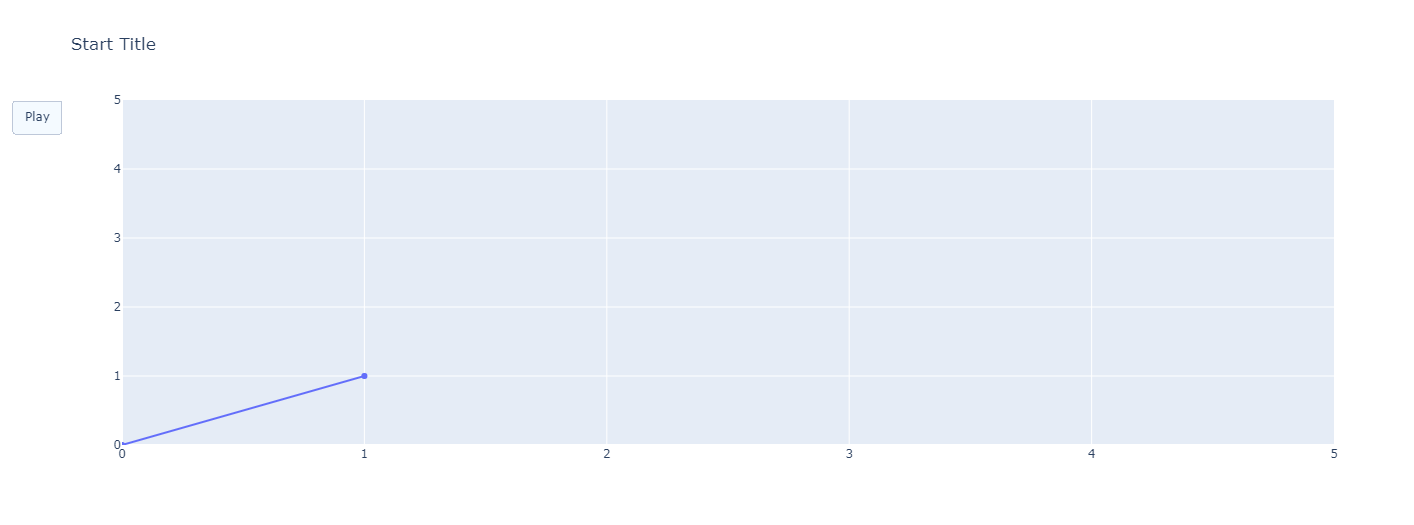

In [9]:
# Basic Animation with Matplotlib and Plotly
# https://towardsdatascience.com/basic-animation-with-matplotlib-and-plotly-5eef4ad6c5aa

# Dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_features=1,
                       noise=50,
                       random_state=543)

In [11]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
  N = float(len(y))

  ms = [m_current]
  bs = [b_current]

  for i in range(epochs):
    y_current = (m_current * X) + b_current
    cost = sum([data ** 2 for data in (y - y_current)]) / N
    
    m_gradient = -(2/N) * sum(X * (y - y_current))
    b_gradient = -(2/N) * sum(y - y_current)
    
    m_current = m_current - (learning_rate * m_gradient)
    b_current = b_current - (learning_rate * b_gradient)

    ms.append(m_current)
    bs.append(b_current)

  return ms, bs

In [12]:
# Run the Linear Regression and store the m and b values
ms, bs = linear_regression(X.ravel(), y, epochs=200, learning_rate=0.01)

# build the lines, mx + b for all ms X's and b's
# Transpose for easier indexing
y_lines = (ms * X + bs).T

In [13]:
import plotly.graph_objects as go

# create the scatter plot
points = go.Scatter(x=X.flatten(), y=y, mode='markers')

# create initial line
line = go.Scatter(x=X.flatten(), y=y_lines[0])

# create a layout with out title
layout = go.Layout(title_text = "Gradient Descent Animation")

# combine the graph_objects into a figure
fig = go.Figure(data=[points, line])

# to see what we have so far
fig.show()

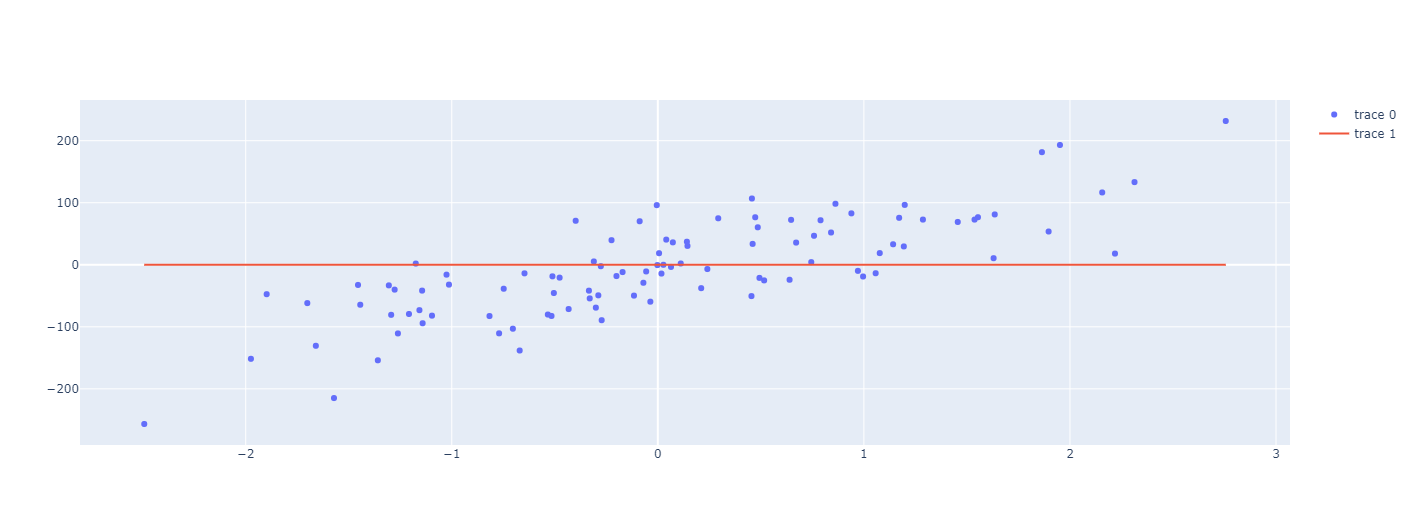

In [14]:
# Animate the line

# create a list of frames
frames = []

# create a frame for every line y
for i in range(len(y_lines)):
  
  # update the line
  line = go.Scatter(x=X.flatten(), y=y_lines[i])

  # create the button
  button = {
      "type": "buttons",
      "buttons": [
                  {
                      "label": "Play",
                      "method": "animate",
                      "args": [None, {"frame": {"duration": 20}}],
                  }
      ],
  }

  # add the button to the layout and update the title to show the gradient descent step
  layout = go.Layout(updatemenus=[button],
                     title_text=f"Gradient Descent Step {i}")
  
  # create a frame object
  frame = go.Frame(
      data=[points, line],
      layout=go.Layout(title_text=f"Gradient Descent Step {i}")
  )

# add the frame object to the frames list
  frames.append(frame)

In [15]:
# Combine all of the above into a singe Figure object

# combine the graph_objects into a figure
fig = go.Figure(data=[points, line],
                frames=frames,
                layout=layout)

# show our animation
fig.show()

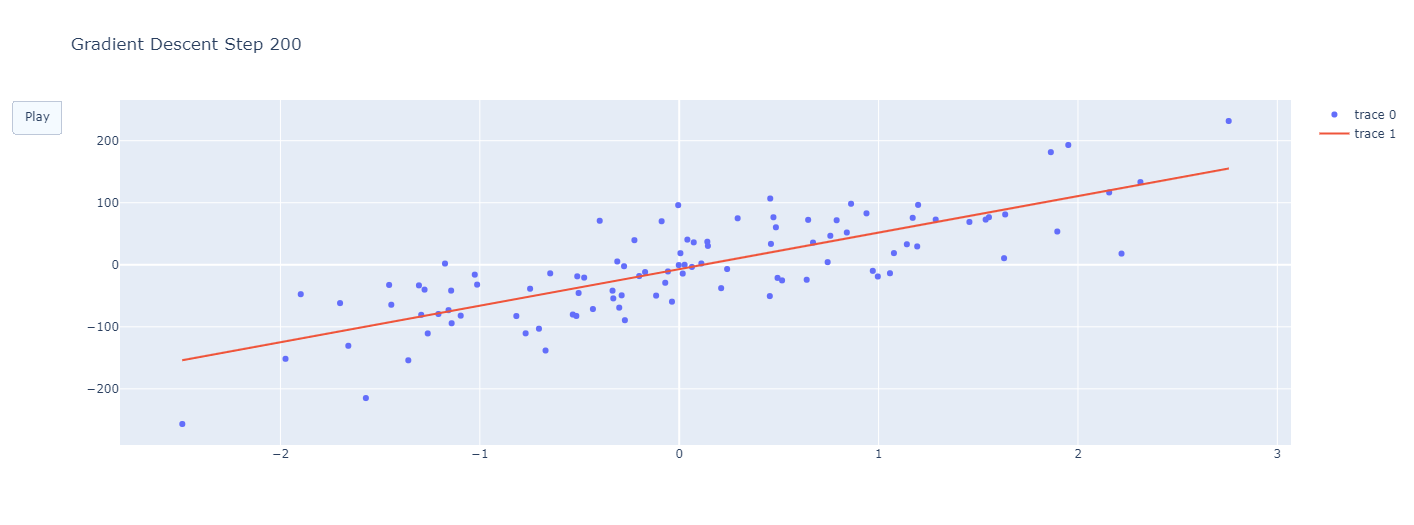